Original shape: (9, 768)
Reduced shape: (9, 2)
Explained variance ratio: [0.4275704 0.2353378]
[ -521.7081      74.293076  3505.013     -967.1442     786.9387
  2411.3877    -586.6372      56.603615  -765.65173   -464.63278
  -650.93506   -373.29465   -957.8156   -1192.3362    -379.15936
   376.37466   -430.0455      78.74927 ]


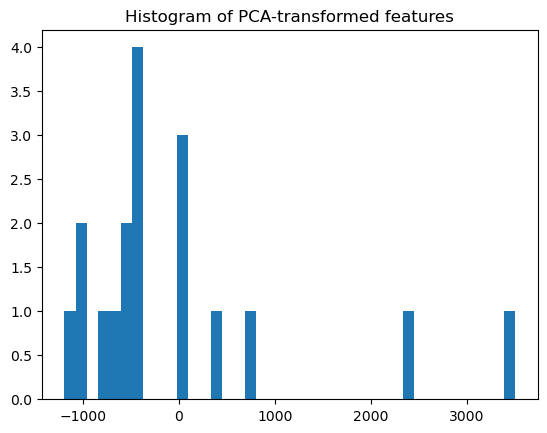

In [16]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Step 1: Image Preprocessing
img_path = 'Data'
images = []
for filename in os.listdir(img_path):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(img_path, filename))
        img = cv2.resize(img, (128, 128)) # Resize the images to make them all the same size
        images.append(img)

# Step 2: Feature Detection
features = []
for img in images:
    # Calculate the color histogram for each channel (R,G,B)
    b_hist = cv2.calcHist([img], [0], None, [256], [0,256])
    g_hist = cv2.calcHist([img], [1], None, [256], [0,256])
    r_hist = cv2.calcHist([img], [2], None, [256], [0,256])
    # Concatenate the histograms to form a feature vector
    hist_features = np.concatenate((r_hist,g_hist,b_hist)).ravel()
    features.append(hist_features)

# Step 4: Feature Selection
# Use PCA to reduce the dimensionality of the feature vectors
from sklearn.decomposition import PCA
X = np.array(features)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Original shape: {}".format(str(X.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
print("Explained variance ratio: {}".format(pca.explained_variance_ratio_))

print(X_pca.ravel())

# Step 5: Feature Extraction
# The PCA-transformed features are now represented as a 1D array.
plt.hist(X_pca.ravel(), bins=40)
plt.title("Histogram of PCA-transformed features")
plt.show()
